In [59]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import glob

In [60]:
luna = "../../luna16/LUNA16/"
mask_v1 = "../../luna16/mask/"
mask_v2 = "../.preprocess/"


uid_test = "1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886"
luna_paths = glob.glob(f"{luna}subset*/*.mhd")

In [61]:
uid_test = "1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886"


luna_path = glob.glob(f"{luna}/subset*/{uid_test}*.mhd")[0]
mask_path = glob.glob(f"{mask_v1}/subset*/{uid_test}*.mhd")[0]


In [62]:
def read_sitk(path):
    ct_mhd = sitk.ReadImage(path)
    ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    return ct_a

ct_luna = read_sitk(luna_path)


In [63]:
from util import plot_ct

index = list(range(82, 99))

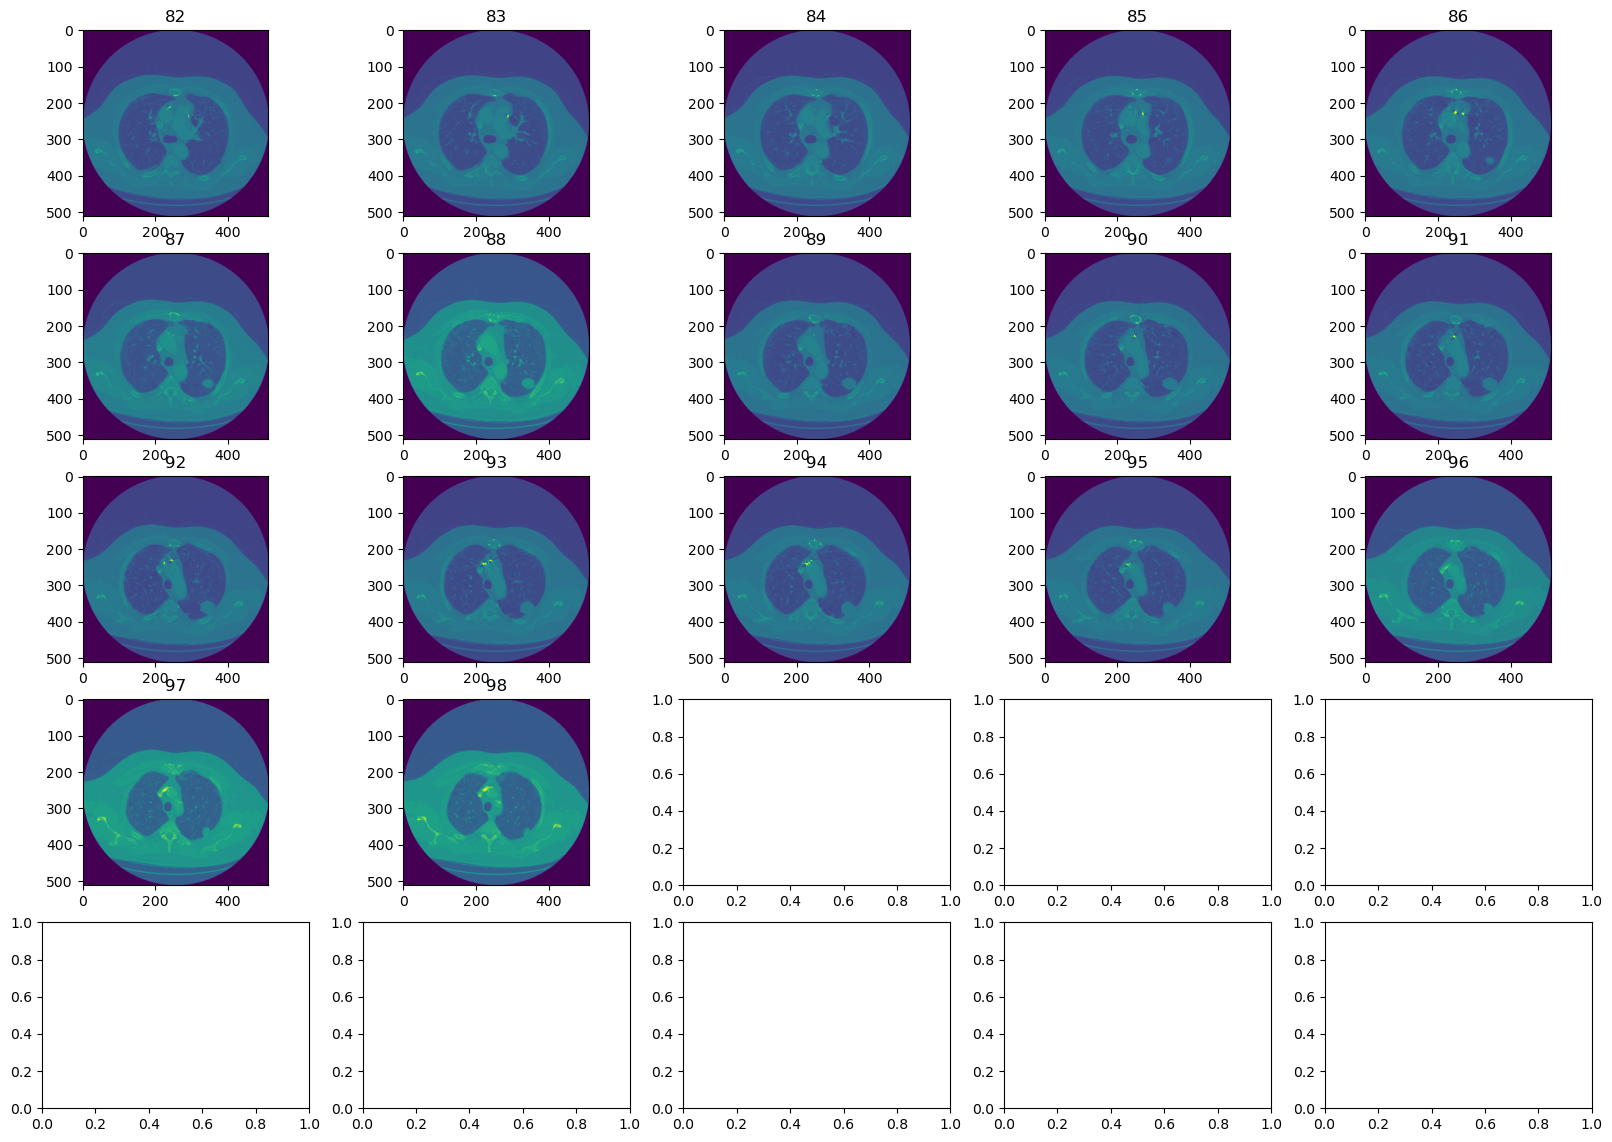

In [64]:
# lunaplot
plot_ct(ct_luna, index)

## Tính độ HU trong phổi


In [65]:
import numpy as np
import pandas as pd
import SimpleITK as sitk 
import glob
from tqdm import tqdm

In [66]:
config_paths = {
    "luna16":"../../luna16/LUNA16/",
    "segment":"../../luna16/seg-lungs-LUNA16/",
    "annotations":"../../luna16/annotations.csv",
    "candidates":"../../luna16/candidates.csv",
    "slide_v1":"../center-coord-chunk",
    "slide_v2":"../center-coord-chunk-v2",
}

In [67]:
def read_sitk(path):
    ct_mhd = sitk.ReadImage(path)
    ct_a = np.array(sitk.GetArrayFromImage(ct_mhd), dtype=np.float32)

    return ct_a

In [68]:
with open("key.txt", 'r') as f:
    keys = f.readlines()[0][11:-2].split(',')

dic = {}
for key in keys:
    dic[float(key)] = 0

In [69]:
paths = glob.glob(config_paths['segment'] + "*.mhd")

# dic = {}

for path in tqdm(paths):
    break

    uid = path.split("\\")[-1][:-4]
    # print(uid)
    luna_path = glob.glob(config_paths["luna16"] + f"subset*/{uid}*.mhd")[0]

    luna_image = read_sitk(luna_path)
    mask_image = read_sitk(path)

    # print(luna_image.shape)
    # print(mask_image.shape)

    pulmonary_left = mask_image == 3
    pulmonary_right = mask_image == 4

    pulmonary = pulmonary_left | pulmonary_right

    value_HU = luna_image[pulmonary]

    for key in dic.keys():
        num_of_key = np.count_nonzero(value_HU == key)
        dic[key] += num_of_key



  0%|          | 0/888 [00:00<?, ?it/s]


In [70]:
with open("hu_pulmonary.txt", 'r') as f:
    dic = f.readlines()

temp_list = dic[0][1:-1].split(",")
new_dic = {}

# phần trăm giá trị
num_value = 0
total_value = 0

for item in temp_list:
    key, value = item.split(":")
    total_value += int(value)

    #clip img
    if float(key) > -1100 and float(key) < 200:
        num_value += int(value)
        new_dic[float(key)] = int(value)


keys, values = list(new_dic.keys()), list(new_dic.values())
keys, values = np.array(keys), np.array(values)

print("Phần trăm giá trị", (num_value/total_value)*100 )

Phần trăm giá trị 99.7839263068489


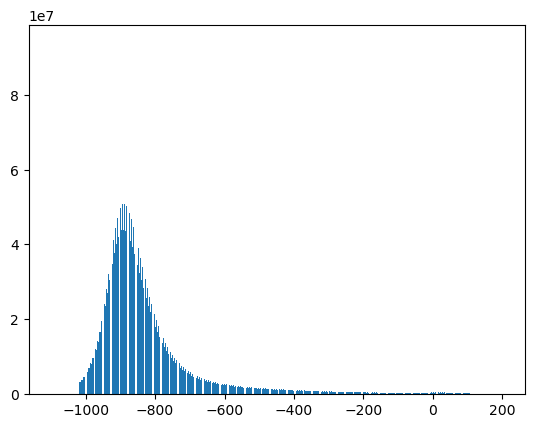

In [71]:
import matplotlib.pyplot as plt

plt.bar(keys, values)

plt.show()

## Tính độ HU của khối U

In [72]:
from util import read_sitk, plot_ct
import os
from glob import glob

test_uid = "1.3.6.1.4.1.14519.5.2.1.6279.6001.287966244644280690737019247886"

29315
29315


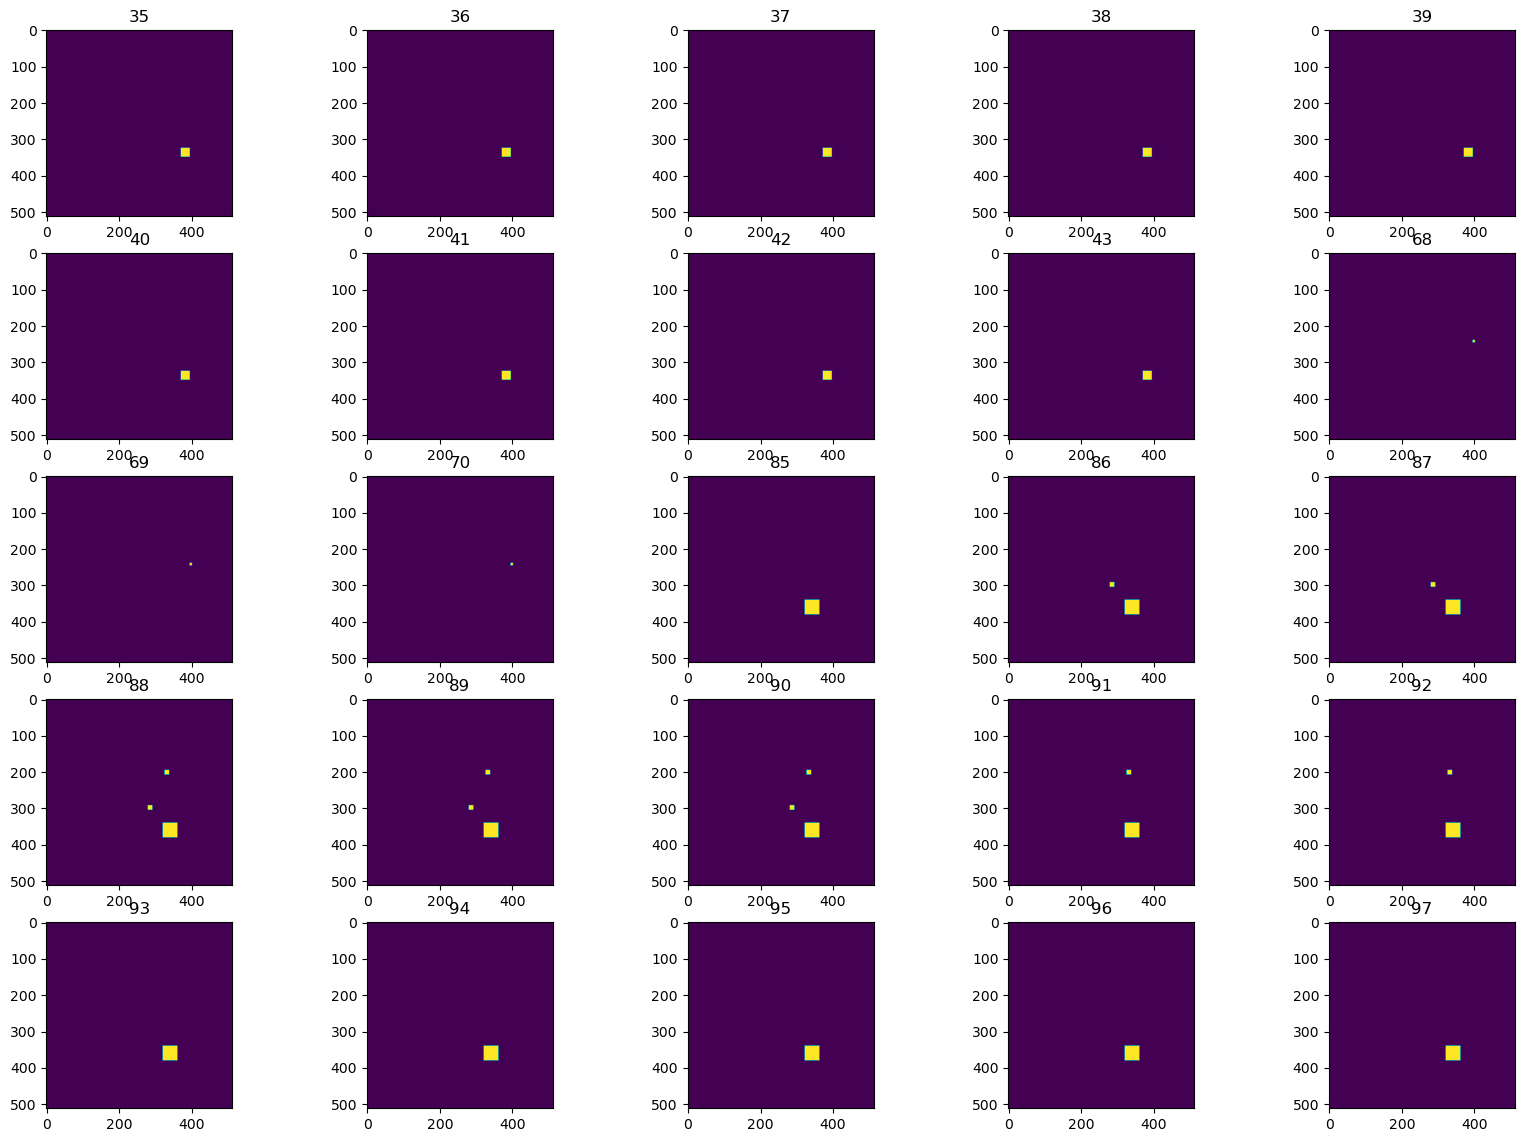

In [73]:
## plot test
path = glob(f"../../luna16/mask/subset*/{test_uid}*.mhd")[0]

img, _, _, _ = read_sitk(path)

index = []
for i in range(len(img)):
    if 255 in img[i]:
        index.append(i)

print(len(np.where(img)[0]))
print(np.count_nonzero(img == 255))
plot_ct(img, index)

In [102]:
# caculate
mask_paths = glob("../../luna16/mask/subset*/*.mhd")

nodule_hu = {}
for path in tqdm(mask_paths):
    img, _, _, _ = read_sitk(path)
    uid = path.split("\\")[-1].split("_")[0]
    
    luna_path = glob(f"../../luna16/LUNA16/subset*/{uid}*.mhd")[0]
    img_luna, _, _, _ = read_sitk(luna_path)

    x, y, z = np.where(img)

    hu_values = img_luna[x, y, z]

    if not np.any(hu_values):
        continue

    for value in hu_values:
        if value not in nodule_hu.keys():
            nodule_hu[value] = 1
        else:
            nodule_hu[value] = nodule_hu[value] + 1


100%|██████████| 888/888 [57:21<00:00,  3.88s/it]  


In [103]:
with open("save/hu_nodule.txt", "w") as f:
    f.write(str(nodule_hu))

In [111]:
with open("save/hu_nodule.txt", 'r') as f:
    dic = f.readlines()

temp_list = dic[0][1:-1].split(",")
new_dic = {}

# phần trăm giá trị
num_value = 0
total_value = 0

for item in temp_list:
    key, value = item.split(":")
    total_value += int(value)

    #clip img
    if float(key) > -1000 and float(key) < 750:
        num_value += int(value)
        new_dic[float(key)] = int(value)


keys, values = list(new_dic.keys()), list(new_dic.values())
keys, values = np.array(keys), np.array(values)

print("Phần trăm giá trị", (num_value/total_value)*100 )

Phần trăm giá trị 98.33292216418631


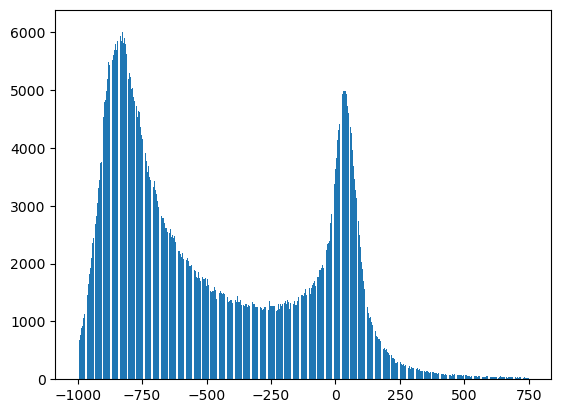

In [112]:
import matplotlib.pyplot as plt

plt.bar(keys, values)

plt.show()